### Recopilación de datos

## Modelado Machine Learnin Prediccion de Demanda de taxis en la Ciudad de Nueva York

El modelado en desarrollo predecirá la demanda de taxis en la ciudad de nueva york, como resultado entregará el porcentaje de la demanda por los ususarios, asi los taxistas poder tener un mapa de zonas de alta demanda. La predicción trabaja bajo los parametros de 'borough', 'tipo de servicio', 'dia de la semana' y la 'hora que se desea tomar el taxi'.

Se tomó la decisión de solo tomar el dataset económico de taxis_2023.parquet que vienes como producto del scrapeo de la pagina web https://www.nyc.gov/site/tlc/index.page, esta decisión fue tomada bajo el análisis de cada datasets dentro de nuestro Data Werehouse después de haber realizado una Matriz de Correlación. 

### Importamos la libreria Pandas para realizar la visualizacion y cambios necesarios a nuestro dataset 

In [239]:
# importamos la libreria y leemos el archivo taxis_2023.parquet
import pandas as pd
taxis_NYC =pd.read_parquet('../0-DataSets/3-DatosScrapingConETL/taxis_2023.parquet')
taxis_NYC 

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_hour,dropoff_date,dropoff_hour
0,1.0,1,0.97,14.30,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0
1,1.0,1,1.10,20.90,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,1
2,1.0,1,1.43,22.96,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0
3,1.0,1,1.66,23.94,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0
4,1.0,1,11.70,75.18,yellow,Manhattan,Bronx,2023-01-01,0,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...
7861599,1.0,1,0.58,8.30,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22
7861600,1.0,1,2.18,26.25,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22
7861601,1.0,2,1.12,9.70,green,Queens,Queens,2024-01-31,23,2024-01-31,23
7861602,1.0,1,4.59,39.97,green,Brooklyn,Manhattan,2024-01-31,23,2024-02-01,0


### ETL: 

Este proceso de realiza para poder tener un dataset mas limpio y prolijo de particularidades como datos atípicos, además de realizar la transformación de la forma mas adecuada para nuestro modelo de Machine Learning.


In [240]:
#Restringiendo parametros atipicos
taxis_NYC = taxis_NYC[taxis_NYC['trip_distance'] <= 100] # este filtro es por que existe datos de atipicos, mayores a 100 millas con un tiempo de desplazamiento de 3 minutos. 
taxis_NYC = taxis_NYC[taxis_NYC['amount'] >= 5] # este filtro es por que existe datos de atipicos, menores a 5 dolares y analizando solo es la propina sin haber havido desplazamiento de distancia. 
taxis_NYC = taxis_NYC[taxis_NYC['pickup_borough'] != 'EWR'] # este filtro es por que existe datos de atipicos, 'EWR' es un  aeropuerto pero esta lleno de errores en tiempos de deplazamiento. 

In [241]:
# Convertir la columna 'pickup_date' a tipo datetime y extraer año, mes y día
taxis_NYC['año'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.year
taxis_NYC['mes'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.month
taxis_NYC['dia'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.day
taxis_NYC['dayofweek'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.dayofweek

# Convertir la columna 'pickup_hour' a tipo datetime y extraer solo la hora
taxis_NYC['hora'] = taxis_NYC['pickup_time']

#añadiendo ceros a la hora
taxis_NYC['hora'] = taxis_NYC['hora'].str.zfill(2) + ':00'

taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_hour,dropoff_date,dropoff_hour,año,mes,dia,dayofweek,hora
0,1.0,1,0.97,14.30,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
1,1.0,1,1.10,20.90,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,1,2023,1,1,6,00:00
2,1.0,1,1.43,22.96,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
3,1.0,1,1.66,23.94,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
4,1.0,1,11.70,75.18,yellow,Manhattan,Bronx,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861599,1.0,1,0.58,8.30,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22,2024,1,31,2,22:00
7861600,1.0,1,2.18,26.25,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22,2024,1,31,2,22:00
7861601,1.0,2,1.12,9.70,green,Queens,Queens,2024-01-31,23,2024-01-31,23,2024,1,31,2,23:00
7861602,1.0,1,4.59,39.97,green,Brooklyn,Manhattan,2024-01-31,23,2024-02-01,0,2024,1,31,2,23:00


In [242]:
#Primero agrupamos por ciertas columnas para verificar si nos conviene o no los datos de la columna 'demand'

# Agrupa los datos en el DataFrame taxis_NYC por varias columnas y realiza agregaciones
# para calcular estadísticas como el número de pasajeros, la distancia promedio del viaje
# y el monto promedio del viaje para cada grupo definido por las columnas especificadas.
taxis_NYC = taxis_NYC.groupby(['service_type', 'pickup_borough', 'año', 'mes', 'dia', 'dayofweek', 'hora']).agg({'passenger_count': 'count'}).reset_index()

# Renombra las columnas del DataFrame resultante para hacerlas más descriptivas.
# Las nuevas columnas son 'service_type', 'pickup_borough', 'año', 'mes', 'dia', 'dayofweek', 'hora',
# 'demand' (número de pasajeros), 'total_millas_recorridas' (distancia promedio del viaje),
# y 'ganancia_hora' (monto promedio del viaje).
taxis_NYC.columns = ['service_type', 'pickup_borough', 'año', 'mes', 'dia', 'dayofweek', 'hora', 'demand']

# Imprime el DataFrame resultante después de aplicar las transformaciones anteriores.
taxis_NYC


,service_type,pickup_borough,año,mes,dia,dayofweek,hora,demand
0,green,Bronx,2023,1,1,6,01:00,1
1,green,Bronx,2023,1,1,6,12:00,2
2,green,Bronx,2023,1,1,6,18:00,1
3,green,Bronx,2023,1,1,6,20:00,1
4,green,Bronx,2023,1,2,0,09:00,1
...,...,...,...,...,...,...,...,...
58605,yellow,Staten Island,2024,1,26,4,12:00,1
58606,yellow,Staten Island,2024,1,27,5,19:00,1
58607,yellow,Staten Island,2024,1,28,6,12:00,1
58608,yellow,Staten Island,2024,1,29,0,08:00,1


In [10]:
#taxis_NYC.to_parquet('../modeloML/DataSetML.parquet')

### EDA

Se realiza un muertedo de los datos en graficas para tener contexto de lo que nos dicen los datos

In [243]:
#hacemos una doble copia por seguridad
conexion = taxis_NYC.copy()
DataSetEDA = conexion.copy()

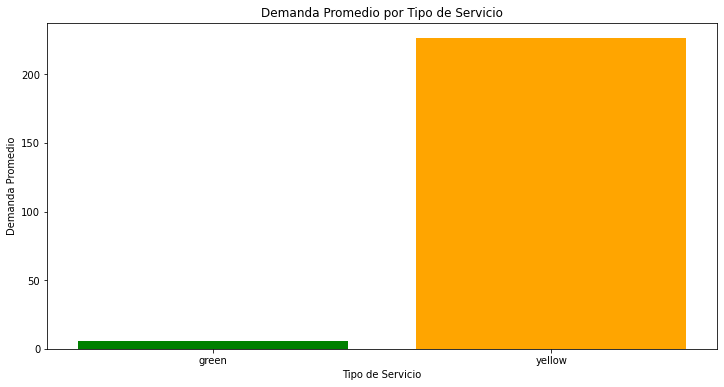

In [244]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'demand'

# Agrupa los datos por tipo de servicio y calcula la demanda promedio para cada tipo
demand_por_servicio = taxis_NYC.groupby('service_type')['demand'].mean()

# Obtiene los tipos de servicio y la demanda promedio
tipos_servicio = demand_por_servicio.index
demanda_promedio = demand_por_servicio.values

plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras
plt.bar(tipos_servicio, demanda_promedio, color=['green','orange'])

# Agrega etiquetas y título al gráfico
plt.xlabel('Tipo de Servicio')
plt.ylabel('Demanda Promedio')
plt.title('Demanda Promedio por Tipo de Servicio')

# Muestra el gráfico
plt.show()


Esta grafica nos proporciona informacion de la demanda real segun tipo de servicio y vemos que los taxis amarillos tienen una mayor demanda sobre los verdes.

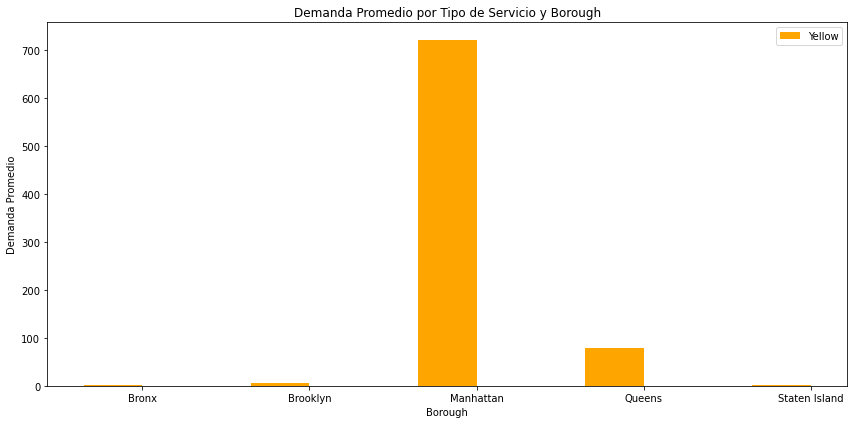

In [245]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = taxis_NYC.groupby(['service_type', 'pickup_borough'])['demand'].mean().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
#plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green']*10, width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Borough')
plt.ylabel('Demanda Promedio')
plt.title('Demanda Promedio por Tipo de Servicio y Borough')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


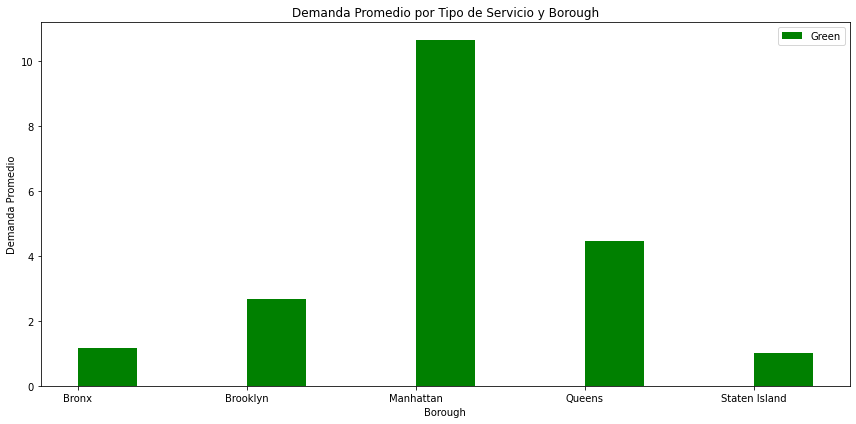

In [246]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = taxis_NYC.groupby(['service_type', 'pickup_borough'])['demand'].mean().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
#plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green'], width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Borough')
plt.ylabel('Demanda Promedio')
plt.title('Demanda Promedio por Tipo de Servicio y Borough')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


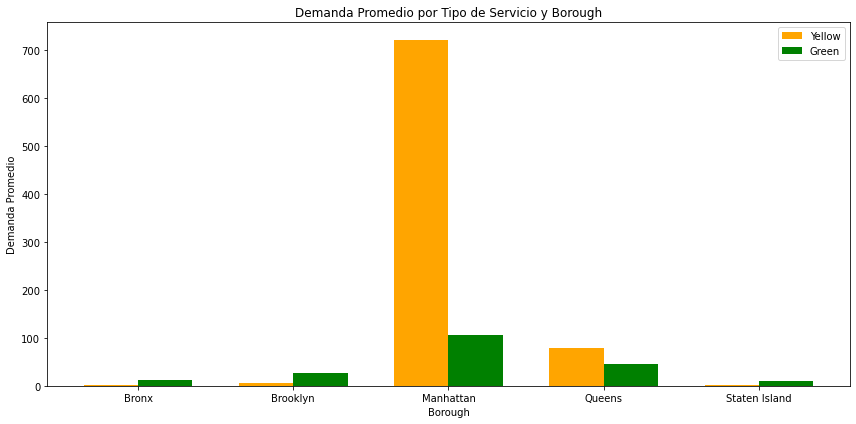

In [247]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = taxis_NYC.groupby(['service_type', 'pickup_borough'])['demand'].mean().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green']*10, width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Borough')
plt.ylabel('Demanda Promedio')
plt.title('Demanda Promedio por Tipo de Servicio y Borough')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


Esta grafica se analiza la demanda por Distrito, se extrapola que la mayor demanda de taxis es en el Distrito de Manhattan y donde se demuestra que existen carros verdes que dan el servicio desde este distrito a otros. El segundo distrito impórtante es Queens donde se ve que hay demanda por los taxis verdes.

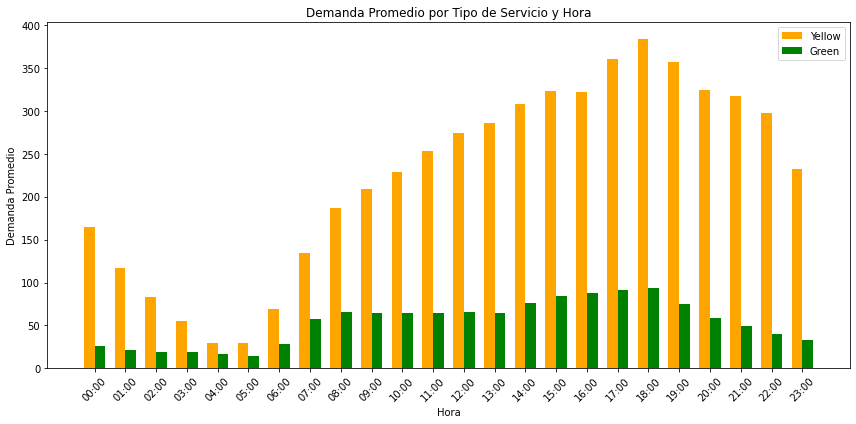

In [248]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y hora y calcula la demanda promedio para cada grupo
demand_por_tipo_y_hora = taxis_NYC.groupby(['service_type', 'hora'])['demand'].mean().unstack()

# Obtiene los tipos de servicio y horas
tipos_servicio = demand_por_tipo_y_hora.index
horas = demand_por_tipo_y_hora.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(horas))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_hora.loc['yellow'], width=ancho_barra, label='Yellow', color='orange')
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_hora.loc['green']*10, width=ancho_barra, label='Green', color='green')

# Configura las etiquetas de los ejes y el título
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.title('Demanda Promedio por Tipo de Servicio y Hora')
plt.xticks(posiciones, horas)  # Establece las etiquetas del eje x como las horas
plt.legend()  # Muestra la leyenda
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


Analizamos de esta grafica que los horarios de mayor demanda es en horario diurno desde la hora de trabajo en la mañana y escuela de los niños 6am, hasta las 23hrs.

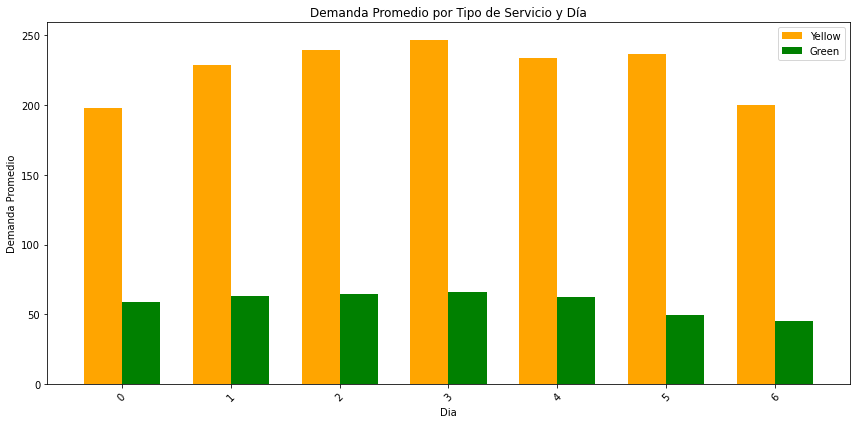

In [249]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = taxis_NYC.groupby(['service_type', 'dayofweek'])['demand'].mean().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green']*10, width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Dia')
plt.ylabel('Demanda Promedio')
plt.title('Demanda Promedio por Tipo de Servicio y Día')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda
plt.xticks(rotation=45)
# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


Podemos analizar de este grafico quesi bien existe mas demanda en los taxis amarillos, la demanda en todos los horarios tiene la misma tendencia, de lunes a viernes es donde ligeramente toman mas taxis y se extrapola por que son los dias de trabajo.

## Modelamiento de Machine Learning

### Se cambiaran ciertos parametros adecuando a nuestro modelo de prediccion de demanda

In [265]:
#hacemos una copia de nuestro DF taxis_NYC.parquet en DataSetML
conexion = taxis_NYC.copy()
DataSetML = conexion.copy()

In [266]:

# como la frecuencia es muy pequena, se hace una agrupacion de demanda por dias de la semana, fuera del año o mes, asi tendremos una demanda mas frecuente.

# Agrupa los datos en el DataFrame taxis_NYC por las columnas 'service_type', 'pickup_borough',
# 'dayofweek' y 'hora', y cuenta el número de registros en cada grupo.
DataSetML = DataSetML.groupby(['service_type', 'pickup_borough', 'dayofweek','hora']).size().reset_index(name='demand')

# Convierte el resultado en un nuevo DataFrame, taxis_NYC.
DataSetML = pd.DataFrame(DataSetML)

# Normaliza la columna 'demand' dividiendo cada valor por el valor máximo en la columna y
# luego multiplicando por 100 para obtener un porcentaje.
DataSetML['demand'] = DataSetML['demand'].apply(lambda x :  (x / DataSetML['demand'].max()))
DataSetML['demand'] = round(DataSetML['demand']*100,2)

# Devuelve el DataFrame resultante después de aplicar las transformaciones anteriores.
DataSetML

,service_type,pickup_borough,dayofweek,hora,demand
0,green,Bronx,0,00:00,17.24
1,green,Bronx,0,01:00,5.17
2,green,Bronx,0,02:00,6.90
3,green,Bronx,0,03:00,13.79
4,green,Bronx,0,04:00,6.90
...,...,...,...,...,...
1500,yellow,Staten Island,6,19:00,1.72
1501,yellow,Staten Island,6,20:00,6.90
1502,yellow,Staten Island,6,21:00,3.45
1503,yellow,Staten Island,6,22:00,3.45


In [267]:
# Mapea los valores de la columna 'service_type' a valores numéricos.
DataSetML['serviceID'] = DataSetML['service_type'].map({'yellow': 1, 'green': 0})

# Mapea los valores de la columna 'pickup_borough' a valores numéricos.
DataSetML['borough2ID'] = DataSetML['pickup_borough'].map({'Manhattan': 1, 'Queens': 2, 'Brooklyn': 3, 'Bronx': 4, 'Staten Island': 5})

# Devuelve el DataFrame resultante con las columnas 'serviceID' y 'borough2ID' añadidas.
DataSetML


,service_type,pickup_borough,dayofweek,hora,demand,serviceID,borough2ID
0,green,Bronx,0,00:00,17.24,0,4
1,green,Bronx,0,01:00,5.17,0,4
2,green,Bronx,0,02:00,6.90,0,4
3,green,Bronx,0,03:00,13.79,0,4
4,green,Bronx,0,04:00,6.90,0,4
...,...,...,...,...,...,...,...
1500,yellow,Staten Island,6,19:00,1.72,1,5
1501,yellow,Staten Island,6,20:00,6.90,1,5
1502,yellow,Staten Island,6,21:00,3.45,1,5
1503,yellow,Staten Island,6,22:00,3.45,1,5


In [268]:
#eliminando las columnas que tienes strings
DataSetML = DataSetML.drop(columns={'service_type','pickup_borough'})
DataSetML

,dayofweek,hora,demand,serviceID,borough2ID
0,0,00:00,17.24,0,4
1,0,01:00,5.17,0,4
2,0,02:00,6.90,0,4
3,0,03:00,13.79,0,4
4,0,04:00,6.90,0,4
...,...,...,...,...,...
1500,6,19:00,1.72,1,5
1501,6,20:00,6.90,1,5
1502,6,21:00,3.45,1,5
1503,6,22:00,3.45,1,5


In [269]:
ModeladoDemanda = DataSetML.copy()

### Entrenamiento del Modelo

In [270]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

ModeladoDemanda['hora'] = pd.to_datetime(ModeladoDemanda['hora'], format='%H:%M').dt.hour

df = ModeladoDemanda
# Separación de características y variable objetivo
X = df.drop(['demand'], axis=1)
y = df['demand']

# Dividimos los datos en conjuntos de entrenamiento 70% y prueba 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)#65=0.9853196519149915:15=0.9850329496606642

# Dividimos los datos de testeo en dos conjuntos: unos el de testeto 50%=15%T y Validacion 50%=15%T
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=65)

# Inicializamos y entrenamos el modelo RandomForestRegressor con parámetros ajustados
model_taxi = RandomForestRegressor(random_state=10)      # Semilla para reproducibilidad

# Entrenamiento de modelos
model_taxi.fit(X_train, y_train)



RandomForestRegressor(random_state=10)

### Testeo del Modelo

In [271]:
# Evaluación de modelos
y_pred = model_taxi.predict(X_test)

mse_taxi = mean_squared_error(y_test, y_pred)
r2_taxi = r2_score(y_test, y_pred)
mae_taxi = mean_absolute_error(y_test, y_pred)
rmse_taxi = np.sqrt(mean_squared_error(y_test, y_pred))
print("MSE para taxi :", mse_taxi)
print("R-squared (R2) para taxi :", r2_taxi)
print("Mean Absolute Error (MAE) para taxi :", mae_taxi)
print("Root Mean Squared Error (RMSE) para taxi :", rmse_taxi)


# Paso 3: Mejora de los taxis verdes
# Analizar características importantes
feature_importances = pd.DataFrame(model_taxi.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

MSE para taxi : 15.939678326814134
R-squared (R2) para taxi : 0.9879368262758187
Mean Absolute Error (MAE) para taxi : 2.513383185840703
Root Mean Squared Error (RMSE) para taxi : 3.9924526705790933
            importance
borough2ID    0.696492
hora          0.141224
serviceID     0.137070
dayofweek     0.025214


### Mejoramiento del modelo

In [272]:
param_grid = {'n_estimators':[50,150,250], # Número de árboles en el bosque
              'max_depth':[5,15,25],       # Profundidad máxima de los árboles
              'min_samples_split':[2,4,6], # Número mínimo de muestras requeridas para dividir un nodo interno
              'min_samples_leaf':[1,2,3]}   # Número mínimo de muestras requeridas para ser un nodo hoja

In [273]:
from sklearn.model_selection import GridSearchCV
model_taxi_cv = GridSearchCV(estimator=model_taxi,param_grid=param_grid, cv=3,scoring='neg_mean_squared_error')
model_taxi_cv.fit(X_train, y_train)
# Evaluación de modelos
y_pred = model_taxi_cv.predict(X_test)

mse_taxi = mean_squared_error(y_test, y_pred)
r2_taxi = r2_score(y_test, y_pred)
mae_taxi = mean_absolute_error(y_test, y_pred)
rmse_taxi = np.sqrt(mean_squared_error(y_test, y_pred))
print("MSE para taxi :", mse_taxi)
print("R-squared (R2) para taxi :", r2_taxi)
print("Mean Absolute Error (MAE) para taxi :", mae_taxi)
print("Root Mean Squared Error (RMSE) para taxi :", rmse_taxi)

MSE para taxi : 15.776420208353986
R-squared (R2) para taxi : 0.9880603802776303
Mean Absolute Error (MAE) para taxi : 2.4561890265487323
Root Mean Squared Error (RMSE) para taxi : 3.9719542052186334


### Guardamos el Modelo en formato .pkl

In [259]:
import joblib
# Guardamos el modelo en un archivo pickle
joblib.dump(model_taxi, '../0-DataSets/4-ModelosPrediccion/model_taxi.pkl')
joblib.dump(model_taxi_cv, '../0-DataSets/4-ModelosPrediccion/model_taxi_cv.pkl')

['model_taxi_cv.pkl']

### Prueba del modelo con datos creados

Vemos el formato de la estructura de dataframe de ingreso al modelo

In [274]:
import joblib
import pandas as pd

In [275]:
df = DataSetML
# Separación de características y variable objetivo
X = df.drop(['demand'], axis=1)
X.head(1)

,dayofweek,hora,serviceID,borough2ID
0,0,00:00,0,4


Preparando datos creados

In [278]:
# Suponiendo que tienes algunos datos para hacer predicciones
nuevos_datos = {
    'dia': [1, 2, 4],  # Ejemplo de valores de día
    'hora': ['17:00', '2:00', '21:00'],  # Ejemplo de valores de hora
    'service_type2': [1, 0, 0],  # Ejemplo de valores de service_type2
    'pickup_borough2': ['1', '2', '5']  # Ejemplo de valores de pickup_borough2
} #dia	hora	total_millas_recorridas	ganancia_hora	service_type2	pickup_borough2
# Crear DataFrame de nuevos datos
X_nuevos_datos = pd.DataFrame(nuevos_datos)
X_nuevos_datos['hora'] = pd.to_datetime(X_nuevos_datos['hora'], format='%H:%M').dt.hour
# Imprimir los nuevos datos
print("Nuevos datos para hacer predicciones:")
X_nuevos_datos
#dayofweek	hora	serviceID	borough2ID

Nuevos datos para hacer predicciones:


,dia,hora,service_type2,pickup_borough2
0,1,17,1,1
1,2,2,0,2
2,4,21,0,5


Prediciendo la demanda de los datos creados

In [279]:
# Cargar el modelo desde el archivo pickle
loaded_model = joblib.load('../0-DataSets/4-ModelosPrediccion/model_taxi_cv.pkl')

# Suponiendo que tienes nuevos datos en X_nuevos_datos
# Hacer predicciones con el modelo cargado
y_pred_ml = loaded_model.predict(X_nuevos_datos)

# Imprimir las predicciones
print("Predicciones del modelo cargado:", y_pred_ml)


Predicciones del modelo cargado: [98.30752 64.7112   1.83056]


c:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dia
- pickup_borough2
- service_type2
Feature names seen at fit time, yet now missing:
- borough2ID
- dayofweek
- serviceID




### Graficando el proceso de entrenamiendo y testeo del Modelo

In [230]:
from sklearn.model_selection import learning_curve
import plotly.graph_objects as go
# Calculamos la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model_taxi, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Creamos el gráfico con Plotly
fig = go.Figure()

# Agregamos la curva de Training score
fig.add_trace(go.Scatter(x=train_sizes, y=train_scores_mean, mode='lines', name='Training Score'))

# Agregamos la curva de Cross-validation score
fig.add_trace(go.Scatter(x=train_sizes, y=test_scores_mean, mode='lines', name='Cross-validation Score'))

# Configuramos el diseño del gráfico
fig.update_layout(
    title='Curva de Aprendizaje',
    xaxis_title='Training examples',
    yaxis_title='Score',
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
)

# Mostramos el gráfico
fig.show()

In [231]:
import plotly.express as px

# Creamos un DataFrame para Plotly Express
df = pd.DataFrame({'Valor Real': y_test, 'Predicciones': y_pred})

# Creamos gráfico de histograma apilado con Plotly Express
fig = px.histogram(df, nbins=30, marginal='rug', labels={'value': 'Valor'},
                   title='Distribución de Predicciones y Valores Reales',
                   category_orders={'variable': ['Valor Real', 'Predicciones']},
                   color_discrete_sequence=['blue', 'orange'],
                   barmode='overlay')

# Configuramos el diseño del gráfico
fig.update_layout(
    xaxis_title='Valor',
    yaxis_title='Frecuencia',
)

# Mostramos el gráfico
fig.show()

In [233]:
# Creamos un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Ordenamos el DataFrame por los valores reales para una mejor visualización
results_df = results_df.sort_values(by='Actual')

# Creamos gráfico de dispersión con Plotly Express
fig = px.scatter(results_df, x=results_df.index, y=['Actual', 'Predicted'],
                 labels={'value': 'Valor'},
                 title='Predicciones vs. Valores Reales',
                 color_discrete_sequence=['red', 'blue'])

# Configuramos el diseño del gráfico
fig.update_layout(
    xaxis_title='Índice',
    yaxis_title='Valor',
)

# Mostramos el gráfico
fig.show()

In [232]:
# Creamos un DataFrame para Plotly Express
df = pd.DataFrame({'Tipo': ['Valores Reales'] * len(y_test) + ['Predicciones'] * len(y_pred),
                   'Valor': list(y_test) + list(y_pred)})

# Creamos gráfico de violín con Plotly Express
fig = px.violin(df, x='Tipo', y='Valor', box=True, points="all", color='Tipo',
                labels={'Tipo': 'Tipo', 'Valor': 'Valor'},
                category_orders={'Tipo': ['Valores Reales', 'Predicciones']},
                violinmode='overlay')

# Configuramos el diseño del gráfico
fig.update_layout(
    title='Distribución de Predicciones y Valores Reales',
    xaxis_title='Tipo',
    yaxis_title='Valor',
    legend=dict(x=0.8, y=0.95),
)

# Mostramos el gráfico
fig.show()

### Validacion del Modelo

In [262]:
# Cargar el modelo desde el archivo pickle
loaded_model = joblib.load('../0-DataSets/4-ModelosPrediccion/model_taxi_cv.pkl')

# Suponiendo que tienes nuevos datos en X_nuevos_datos
# Hacer predicciones con el modelo cargado
y_pred_validacion = loaded_model.predict(X_validation)

# Imprimir las predicciones
print("Predicciones del modelo cargado:", y_pred_validacion)


Predicciones del modelo cargado: [93.46252 18.15796 98.23168  4.51584 98.26616  1.94828 21.18736  4.05544
 94.85064 93.3242  92.05528 95.66248 85.99976 92.54376 93.1884  87.55256
 96.48152 15.79884 12.12404 86.3362  97.53288  4.26032 98.28    89.73888
  4.95804 98.22464 95.74504 91.56572 35.04768  5.7314  95.18716 95.87668
  5.67336 89.25008 97.54712 93.02712 67.24172  4.51584 65.61432 84.8702
 72.62016 72.46956 98.19008 94.71204 15.95408  8.16664 98.28    50.3102
 14.2916  95.70312 96.92656 98.09316 98.2524  84.98092 19.23252 94.9598
  5.58584 87.58568 95.48392 98.07932 16.02092 94.8914  93.15364 91.70964
 34.51128 80.32364 67.722   98.28688 97.70068 97.25584 36.46876 94.53208
  6.11448 98.13468 16.8978   4.17964 78.37008 98.273    6.21408 95.23592
  4.7578  84.97908 42.13092 96.55    94.17944 93.78644  4.26032 72.29704
 18.58212 95.06372 94.88504 98.03796 37.39344 12.0248  89.63152 94.83
 97.84536 84.69048 96.41228 40.8502  95.05404 98.28    26.7124  89.45696
 26.75316 83.932   96.53

In [263]:
mse_taxi = mean_squared_error(y_validation, y_pred_validacion)
r2_taxi = r2_score(y_validation, y_pred_validacion)
mae_taxi = mean_absolute_error(y_validation, y_pred_validacion)
rmse_taxi = np.sqrt(mean_squared_error(y_validation, y_pred_validacion))
print("MSE para taxi :", mse_taxi)
print("R-squared (R2) para taxi :", r2_taxi)
print("Mean Absolute Error (MAE) para taxi :", mae_taxi)
print("Root Mean Squared Error (RMSE) para taxi :", rmse_taxi)

MSE para taxi : 32.73527668339834
R-squared (R2) para taxi : 0.9745638595598586
Mean Absolute Error (MAE) para taxi : 3.3606899115044984
Root Mean Squared Error (RMSE) para taxi : 5.721475044374339


In [264]:
# Creamos un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred_validacion})

# Ordenamos el DataFrame por los valores reales para una mejor visualización
results_df = results_df.sort_values(by='Actual')

# Creamos gráfico de dispersión con Plotly Express
fig = px.scatter(results_df, x=results_df.index, y=['Actual', 'Predicted'],
                 labels={'value': 'Valor'},
                 title='Predicciones vs. Valores Reales',
                 color_discrete_sequence=['red', 'blue'])

# Configuramos el diseño del gráfico
fig.update_layout(
    xaxis_title='Índice',
    yaxis_title='Valor',
)

# Mostramos el gráfico
fig.show()